In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from data.cifar10_dataset_loader import CIFAR10DataSetLoader
from utils.visualization import visualize_samples,visualize_loss_accuracy_plot
#from models.cifar10_dialation_dsc import Cifar10Net
from models.cifar10_dialation_dsc_noMaxpool import Cifar10Net
from training.optimizers import get_optimizer_and_scheduler
from training.trainer import start_training

c:\Users\ic016726\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.22). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
data_loader = CIFAR10DataLoader()

d:\Projects\ERAV3\Session8\data\cifar10_dataset.py:20: UserWarning: Argument 'fill_value' is not valid and will be ignored.
  CoarseDropout(
d:\Projects\ERAV3\Session8\data\cifar10_dataset.py:20: UserWarning: Argument 'mask_fill_value' is not valid and will be ignored.
  CoarseDropout(


Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Get the train and test DataLoaders
train_loader = data_loader.get_train_loader()
test_loader = data_loader.get_test_loader()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

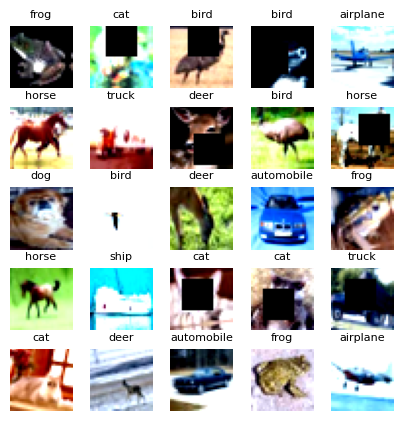

In [4]:
# Visualize 25 sample images from the CIFAR-10 training dataset
visualize_samples(train_loader)

In [5]:
from torchsummary import summary
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Cifar10Net().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
 Conv2d_BasicBlock-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
 Conv2d_BasicBlock-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
      BatchNorm2d-10           [-1, 64, 32, 32]             128
             ReLU-11           [-1, 64, 32, 32]               0
Conv2d_BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]          18,432
Conv2d_TransitionBlock_

d:\Projects\ERAV3\Session8\models\cifar10_dialation_dsc_noMaxpool.py:60: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


In [7]:
optimizer_params = {
    "type": "SGD",
    "lr": 0.1,
    "momentum": 0.9,
    "weight_decay": 0.0
}

scheduler_params = {
    "type": "StepLR",
    "step_size": 15,
    "gamma": 0.2
}
optimizer, scheduler = get_optimizer_and_scheduler(model, optimizer_params, scheduler_params)

In [8]:
EPOCHS = 35
train_losses,test_losses,train_acc,test_acc=start_training(model,device,train_loader,test_loader,optimizer,scheduler,EPOCHS)


 ***** EPOCH:0 ***** 


Loss=1.7282600402832031 Batch_id=390 Accuracy=33.28: 100%|██████████| 391/391 [00:24<00:00, 15.97it/s]



Test set: Average loss: 1.5118, Accuracy: 4457/10000 (44.57%)

Learning Rate after epoch 0: 0.100000
 ***** EPOCH:1 ***** 


Loss=1.2402783632278442 Batch_id=390 Accuracy=45.35: 100%|██████████| 391/391 [00:26<00:00, 14.79it/s]



Test set: Average loss: 1.3176, Accuracy: 5186/10000 (51.86%)

Learning Rate after epoch 1: 0.100000
 ***** EPOCH:2 ***** 


Loss=1.3008427619934082 Batch_id=390 Accuracy=51.16: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]



Test set: Average loss: 1.1995, Accuracy: 5667/10000 (56.67%)

Learning Rate after epoch 2: 0.100000
 ***** EPOCH:3 ***** 


Loss=1.2143839597702026 Batch_id=390 Accuracy=56.15: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]



Test set: Average loss: 1.0861, Accuracy: 6077/10000 (60.77%)

Learning Rate after epoch 3: 0.100000
 ***** EPOCH:4 ***** 


Loss=0.8993573188781738 Batch_id=390 Accuracy=59.99: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]



Test set: Average loss: 1.0940, Accuracy: 6319/10000 (63.19%)

Learning Rate after epoch 4: 0.100000
 ***** EPOCH:5 ***** 


Loss=0.9194086790084839 Batch_id=390 Accuracy=63.21: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]



Test set: Average loss: 0.8583, Accuracy: 7011/10000 (70.11%)

Learning Rate after epoch 5: 0.100000
 ***** EPOCH:6 ***** 


Loss=1.055097222328186 Batch_id=390 Accuracy=66.00: 100%|██████████| 391/391 [00:27<00:00, 14.15it/s] 



Test set: Average loss: 0.8054, Accuracy: 7194/10000 (71.94%)

Learning Rate after epoch 6: 0.100000
 ***** EPOCH:7 ***** 


Loss=1.011053204536438 Batch_id=390 Accuracy=68.28: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s] 



Test set: Average loss: 1.0097, Accuracy: 6610/10000 (66.10%)

Learning Rate after epoch 7: 0.100000
 ***** EPOCH:8 ***** 


Loss=0.9102139472961426 Batch_id=390 Accuracy=69.70: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]



Test set: Average loss: 0.7483, Accuracy: 7435/10000 (74.35%)

Learning Rate after epoch 8: 0.100000
 ***** EPOCH:9 ***** 


Loss=0.7044180631637573 Batch_id=390 Accuracy=70.92: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]



Test set: Average loss: 0.6782, Accuracy: 7623/10000 (76.23%)

Learning Rate after epoch 9: 0.100000
 ***** EPOCH:10 ***** 


Loss=0.7088737487792969 Batch_id=390 Accuracy=72.02: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]



Test set: Average loss: 0.7223, Accuracy: 7532/10000 (75.32%)

Learning Rate after epoch 10: 0.100000
 ***** EPOCH:11 ***** 


Loss=0.9960017204284668 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]



Test set: Average loss: 0.6199, Accuracy: 7864/10000 (78.64%)

Learning Rate after epoch 11: 0.100000
 ***** EPOCH:12 ***** 


Loss=0.6425613164901733 Batch_id=390 Accuracy=73.56: 100%|██████████| 391/391 [00:27<00:00, 14.47it/s]



Test set: Average loss: 0.6067, Accuracy: 7863/10000 (78.63%)

Learning Rate after epoch 12: 0.100000
 ***** EPOCH:13 ***** 


Loss=0.524800717830658 Batch_id=390 Accuracy=74.72: 100%|██████████| 391/391 [00:28<00:00, 13.62it/s]  



Test set: Average loss: 0.6367, Accuracy: 7788/10000 (77.88%)

Learning Rate after epoch 13: 0.100000
 ***** EPOCH:14 ***** 


Loss=0.911903977394104 Batch_id=390 Accuracy=74.70: 100%|██████████| 391/391 [00:27<00:00, 14.48it/s]  



Test set: Average loss: 0.5958, Accuracy: 7953/10000 (79.53%)

Learning Rate after epoch 14: 0.020000
 ***** EPOCH:15 ***** 


Loss=0.4948452115058899 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:26<00:00, 14.48it/s] 



Test set: Average loss: 0.5171, Accuracy: 8220/10000 (82.20%)

Learning Rate after epoch 15: 0.020000
 ***** EPOCH:16 ***** 


Loss=0.684893012046814 Batch_id=390 Accuracy=79.36: 100%|██████████| 391/391 [00:27<00:00, 14.46it/s]  



Test set: Average loss: 0.4957, Accuracy: 8279/10000 (82.79%)

Learning Rate after epoch 16: 0.020000
 ***** EPOCH:17 ***** 


Loss=0.6700607538223267 Batch_id=390 Accuracy=79.56: 100%|██████████| 391/391 [00:27<00:00, 14.46it/s] 



Test set: Average loss: 0.4979, Accuracy: 8275/10000 (82.75%)

Learning Rate after epoch 17: 0.020000
 ***** EPOCH:18 ***** 


Loss=0.7411683201789856 Batch_id=390 Accuracy=79.68: 100%|██████████| 391/391 [00:27<00:00, 14.45it/s] 



Test set: Average loss: 0.4813, Accuracy: 8336/10000 (83.36%)

Learning Rate after epoch 18: 0.020000
 ***** EPOCH:19 ***** 


Loss=0.4485620856285095 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s] 



Test set: Average loss: 0.4878, Accuracy: 8322/10000 (83.22%)

Learning Rate after epoch 19: 0.020000
 ***** EPOCH:20 ***** 


Loss=0.5744434595108032 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s] 



Test set: Average loss: 0.4831, Accuracy: 8352/10000 (83.52%)

Learning Rate after epoch 20: 0.020000
 ***** EPOCH:21 ***** 


Loss=0.3541814386844635 Batch_id=390 Accuracy=80.34: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s] 



Test set: Average loss: 0.4932, Accuracy: 8311/10000 (83.11%)

Learning Rate after epoch 21: 0.020000
 ***** EPOCH:22 ***** 


Loss=0.5683345198631287 Batch_id=390 Accuracy=80.60: 100%|██████████| 391/391 [00:28<00:00, 13.87it/s] 



Test set: Average loss: 0.4798, Accuracy: 8336/10000 (83.36%)

Learning Rate after epoch 22: 0.020000
 ***** EPOCH:23 ***** 


Loss=0.4395830035209656 Batch_id=390 Accuracy=80.86: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s] 



Test set: Average loss: 0.4683, Accuracy: 8399/10000 (83.99%)

Learning Rate after epoch 23: 0.020000
 ***** EPOCH:24 ***** 


Loss=0.4635164141654968 Batch_id=390 Accuracy=80.54: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s] 



Test set: Average loss: 0.4748, Accuracy: 8395/10000 (83.95%)

Learning Rate after epoch 24: 0.020000
 ***** EPOCH:25 ***** 


Loss=0.5220059156417847 Batch_id=390 Accuracy=80.81: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s] 



Test set: Average loss: 0.4705, Accuracy: 8366/10000 (83.66%)

Learning Rate after epoch 25: 0.020000
 ***** EPOCH:26 ***** 


Loss=0.525088369846344 Batch_id=390 Accuracy=80.85: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]  



Test set: Average loss: 0.4882, Accuracy: 8335/10000 (83.35%)

Learning Rate after epoch 26: 0.020000
 ***** EPOCH:27 ***** 


Loss=0.5250863432884216 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:28<00:00, 13.68it/s] 



Test set: Average loss: 0.4764, Accuracy: 8408/10000 (84.08%)

Learning Rate after epoch 27: 0.020000
 ***** EPOCH:28 ***** 


Loss=0.5854607820510864 Batch_id=390 Accuracy=81.30: 100%|██████████| 391/391 [00:27<00:00, 14.20it/s] 



Test set: Average loss: 0.4700, Accuracy: 8433/10000 (84.33%)

Learning Rate after epoch 28: 0.020000
 ***** EPOCH:29 ***** 


Loss=0.47128215432167053 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:27<00:00, 14.43it/s]



Test set: Average loss: 0.4562, Accuracy: 8459/10000 (84.59%)

Learning Rate after epoch 29: 0.004000
 ***** EPOCH:30 ***** 


Loss=0.3106652498245239 Batch_id=390 Accuracy=82.14: 100%|██████████| 391/391 [00:27<00:00, 14.43it/s] 



Test set: Average loss: 0.4432, Accuracy: 8498/10000 (84.98%)

Learning Rate after epoch 30: 0.004000
 ***** EPOCH:31 ***** 


Loss=0.5932031869888306 Batch_id=390 Accuracy=82.60: 100%|██████████| 391/391 [00:29<00:00, 13.48it/s] 



Test set: Average loss: 0.4487, Accuracy: 8503/10000 (85.03%)

Learning Rate after epoch 31: 0.004000
 ***** EPOCH:32 ***** 


Loss=0.49197906255722046 Batch_id=390 Accuracy=82.49: 100%|██████████| 391/391 [00:27<00:00, 14.47it/s]



Test set: Average loss: 0.4433, Accuracy: 8501/10000 (85.01%)

Learning Rate after epoch 32: 0.004000
 ***** EPOCH:33 ***** 


Loss=0.6614604592323303 Batch_id=390 Accuracy=82.32: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s] 



Test set: Average loss: 0.4411, Accuracy: 8524/10000 (85.24%)

Learning Rate after epoch 33: 0.004000
 ***** EPOCH:34 ***** 


Loss=0.5246753096580505 Batch_id=390 Accuracy=82.99: 100%|██████████| 391/391 [00:27<00:00, 14.39it/s] 



Test set: Average loss: 0.4397, Accuracy: 8516/10000 (85.16%)

Learning Rate after epoch 34: 0.004000
Best Test Accuracy:85.24


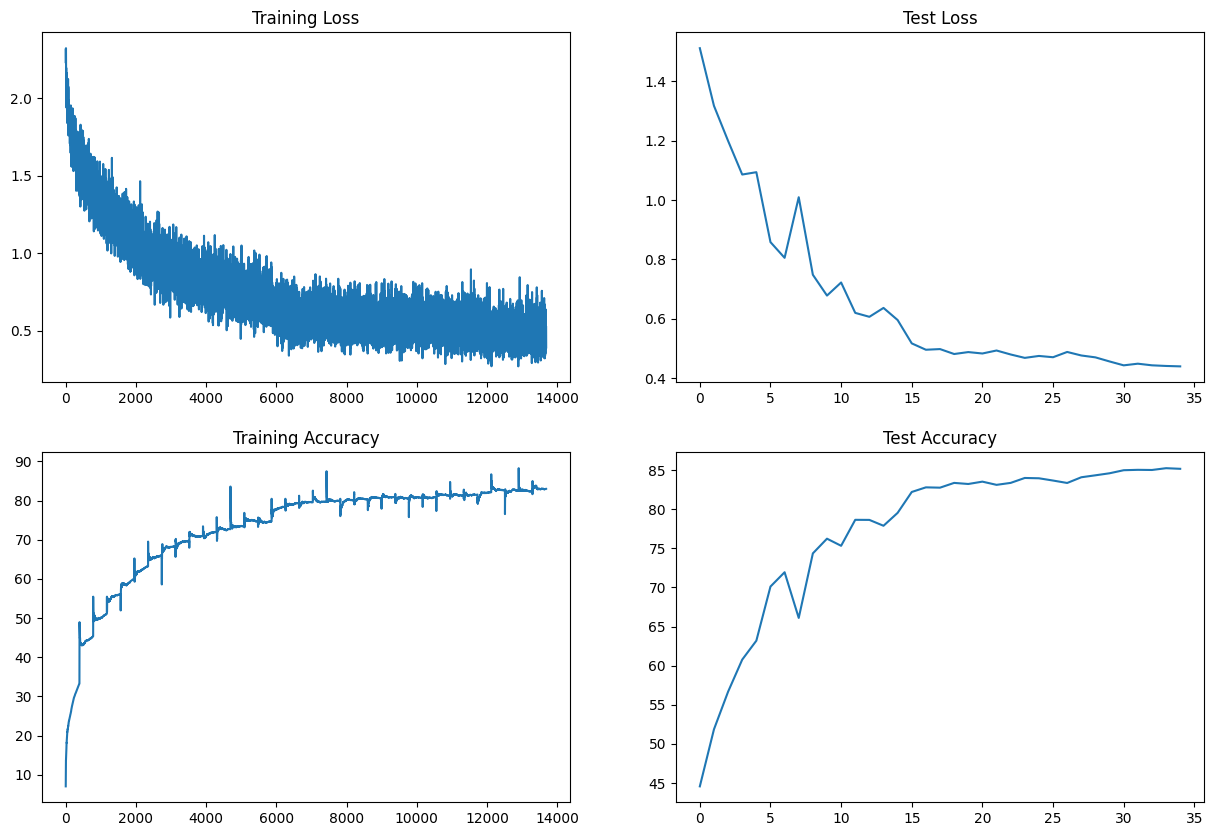

In [9]:
visualize_loss_accuracy_plot(train_losses,test_losses,train_acc,test_acc)